

1.   Step 1. create a dataframe with 5 raw tweets. 
2.   Step 2. install tweet-preprocessor 
3.   Step 3. noise removal -- for tweets 
4.   Step 4. general preprocessing procedures

In [ ]:
import pandas as pd

In [ ]:
t1 = "COVID-19 (Coronavirus) Latest News & Statistics. We post updates 24/7 as they come in, all data is from https://t.co/XmYqcFcEtM - #Coronavirus #COVID19"
t2 = "Still standing, but barely, while upholding your civil rights in Illinois against government corruption #Bitcoin #HEX crypto"
t3 = "24:7 Worldwide News. Follow @iNewsroom for realtime reports & join the LIVE Newsroom at: https://t.co/MAlfMkJMNZ"
t4 = '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>'
t5 = 'Product design/product management for healthcare, enterprise and more. Author, Mastering Collaboration. Also I ?????? music. Persistent. She/her.'
tweets = [t1,t2,t3,t4,t5]
doc_id = [1,2,3,4,5]
data_tweet = pd.DataFrame()
data_tweet['doc_id']=doc_id
data_tweet['text']=tweets
del t1,t2,t3,t4,t5,tweets,doc_id
print(data_tweet)

   doc_id                                               text
0       1  COVID-19 (Coronavirus) Latest News & Statistic...
1       2  Still standing, but barely, while upholding yo...
2       3  24:7 Worldwide News. Follow @iNewsroom for rea...
3       4  <a href="https://mobile.twitter.com" rel="nofo...
4       5  Product design/product management for healthca...


In [ ]:
!pip install tweet-preprocessor
# https://github.com/s/preprocessor


In [ ]:
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.HASHTAG)
p.clean(data_tweet['text'][3])


'<a href="" rel="nofollow">Twitter Web App</a>'


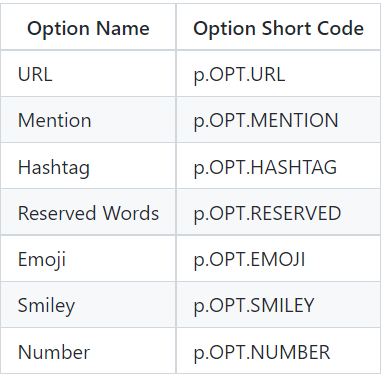

In [ ]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [ ]:
remove_html_tags(data_tweet['text'][3])

'Twitter Web App'

In [ ]:
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.HASHTAG)
data_tweet['text'] = data_tweet['text'].apply(lambda x:p.clean(x))
print(data_tweet)
data_tweet['text'] = data_tweet['text'].apply(lambda x:remove_html_tags(x))
print(data_tweet)


   doc_id                                               text
0       1  COVID-19 (Coronavirus) Latest News & Statistic...
1       2  Still standing, but barely, while upholding yo...
2       3  24:7 Worldwide News. Follow for realtime repor...
3       4      <a href="" rel="nofollow">Twitter Web App</a>
4       5  Product design/product management for healthca...
   doc_id                                               text
0       1  COVID-19 (Coronavirus) Latest News & Statistic...
1       2  Still standing, but barely, while upholding yo...
2       3  24:7 Worldwide News. Follow for realtime repor...
3       4                                    Twitter Web App
4       5  Product design/product management for healthca...


In [ ]:
import re

# 4. general preprocessing procedures
# 4.1. lowercase
data_tweet['text'] = data_tweet['text'].apply(lambda x:x.lower())
print('lowercase',data_tweet)

# 4.2. removePunctuation
def removePunctuation(text):
  return(re.sub(r'[^\w\s]', '', text))
data_tweet['text'] = data_tweet['text'].apply(lambda x:removePunctuation(x))
print('removePunctuation',data_tweet)

# 4.3. removeNumbers
def removeNumbers(text):
  return(re.sub(r'\d+', '', text))

data_tweet['text'] = data_tweet['text'].apply(lambda x:removeNumbers(x))
print('removeNumbers',data_tweet)


# 4.6. stripWhitespace
def stripWhitespace(text):
  return(" ".join(text.split()))

data_tweet['text'] = data_tweet['text'].apply(lambda x:stripWhitespace(x))
print('stripWhitespace',data_tweet)


# 4.4. remove stopwords
def removeStopwords(text):
  # import nltk
  # nltk.download('stopwords')
  # from nltk.corpus import stopwords
  # stop_words = set(stopwords.words('english'))
  from sklearn import feature_extraction 
  stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
  text=text.split()
  text=[x for x in text if x not in stop_words]
  return(" ".join(text))

data_tweet['text'] = data_tweet['text'].apply(lambda x:removeStopwords(x))
print('removeStopwords',data_tweet)

# 4.5. remove task specific stopwords
def removeSpecialWords(text):
  stop_words = ["dr", "doctor"]
  text=text.split()
  text=[x for x in text if x not in stop_words]
  return(" ".join(text))

data_tweet['text'] = data_tweet['text'].apply(lambda x:removeSpecialWords(x))
print('removeSpecialWords',data_tweet)


# 4.7. word stemming
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer 

def PSstemming(text):
  stemmer_ps = PorterStemmer()  
  text = [stemmer_ps.stem(word) for word in text.split()]
  return(" ".join(text))

def SSstemming(text):
  stemmer_ss = SnowballStemmer("english") 
  text = [stemmer_ss.stem(word) for word in text.split()]
  return(" ".join(text))

data_tweet['text'] = data_tweet['text'].apply(lambda x:PSstemming(x))
data_tweet['text'] = data_tweet['text'].apply(lambda x:SSstemming(x))
print('stemming',data_tweet)


#4.8. word lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def tLemmatization(text):
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in text.split()]
  return(" ".join(text))

data_tweet['text'] = data_tweet['text'].apply(lambda x:tLemmatization(x))
print('lemmatization',data_tweet)



lowercase    doc_id                                               text
0       1  covid-19 (coronavirus) latest news & statistic...
1       2  still standing, but barely, while upholding yo...
2       3  24:7 worldwide news. follow for realtime repor...
3       4                                    twitter web app
4       5  product design/product management for healthca...
removePunctuation    doc_id                                               text
0       1  covid19 coronavirus latest news  statistics we...
1       2  still standing but barely while upholding your...
2       3  247 worldwide news follow for realtime reports...
3       4                                    twitter web app
4       5  product designproduct management for healthcar...
removeNumbers    doc_id                                               text
0       1  covid coronavirus latest news  statistics we p...
1       2  still standing but barely while upholding your...
2       3   worldwide news follow for realt

In [ ]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dr", "doctor"]] #remove task specific stopwords
  text = " ".join(text)
  # stemmer_ps = PorterStemmer()  
  # text = [stemmer_ps.stem(word) for word in text.split()] #stemming
  # text = " ".join(text)
  # lemmatizer = WordNetLemmatizer()
  # text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  # text = " ".join(text)
  return(text)



In [ ]:
data_tweet['text'] = data_tweet['text'].apply(lambda x:preprocess(x))
print('all',data_tweet)
